<a href="https://colab.research.google.com/github/raziq0835/ML_Basics/blob/main/Nureal_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model


Traning data shape(60000, 28, 28)
Traning label shape(60000,)
Testing data shape(10000, 28, 28)
Testing label shape(10000,)
Number  of classes 10


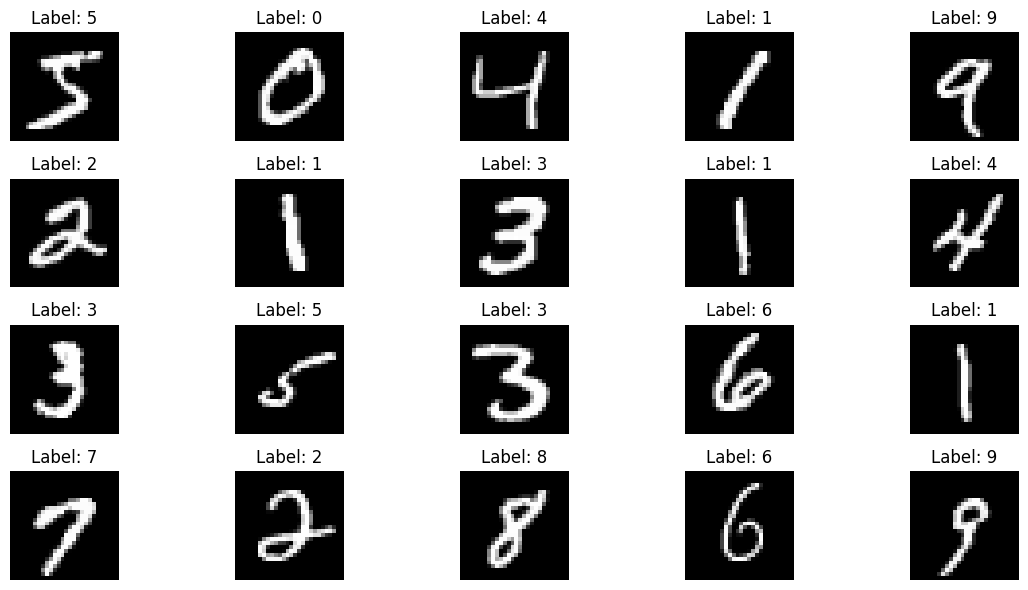

In [12]:
(x_train_tf,y_train_tf),(x_test_tf,y_test_tf) = keras.datasets.mnist.load_data()

print(f'Traning data shape{x_train_tf.shape}')
print(f'Traning label shape{y_train_tf.shape}')
print(f'Testing data shape{x_test_tf.shape}')
print(f'Testing label shape{y_test_tf.shape}')
print(f'Number  of classes {len(np.unique(y_train_tf))}')

# Visualize some sample images
fig, axes = plt.subplots(4, 5, figsize=(12, 6))
for i in range(20):
    ax = axes[i//5, i%5]
    ax.imshow(x_train_tf[i], cmap='gray')
    ax.set_title(f'Label: {y_train_tf[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [13]:
x_train_tf =x_test_tf.astype('float32')/255.0
x_test_tf =x_test_tf.astype('float32')/255.0

In [17]:
#Data rehapeing
x_train_tf = x_train_tf.reshape(-1,28*28)
x_test_tf = x_test_tf.reshape(-1,28*28)

In [19]:
x_train_tf[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
x_train_tf[0].shape

(784,)

In [29]:
y_train_cat = keras.utils.to_categorical(y_train_tf,10)
y_test_cat = keras.utils.to_categorical(y_test_tf,10)

In [31]:
y_train_cat[0].shape

(10,)

In [26]:
model_tf = keras.Sequential([
    keras.layers.Dense(128,activation='relu',input_shape=(784,)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

print(model_tf.summary())

plot_model(model_tf, to_file="model_plot.png", show_shapes=True, show_layer_names=True)

model_tf.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

None


In [34]:
history_tf = model_tf.fit(x_train_tf,y_train_cat,batch_size=32 ,epochs=50,validation_split=0.2)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9474 - loss: 0.1910 - val_accuracy: 0.0960 - val_loss: 9.7978
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9661 - loss: 0.1366 - val_accuracy: 0.1015 - val_loss: 10.0466
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9712 - loss: 0.1125 - val_accuracy: 0.0980 - val_loss: 10.0460
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9752 - loss: 0.0958 - val_accuracy: 0.0965 - val_loss: 10.0917
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9759 - loss: 0.0947 - val_accuracy: 0.1085 - val_loss: 10.2174
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9759 - loss: 0.0998 - val_accuracy: 0.0950 - val_loss: 10.4855
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9143 - loss: 0.2623 - val_accuracy: 0.0935 - val_loss: 10.6144
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9021 - loss: 0.2907 - val_accura